<div class="alert alert-block alert-warning">

<h1>Text Emotion Recognition</h1>
    
<a href="https://www.kaggle.com/datasets/shreejitcheela/text-emotion-recognition">Kaggle Link</a>

    
<h2>About Dataset</h2>
<blockquote>Emotions play a vital role in human communication, and detecting emotions from text data is a challenging task. The ability to automatically recognize emotions from text has many practical applications, such as in sentiment analysis, social media monitoring, and customer feedback analysis.</blockquote>

</div>

<hr>

<div class="alert alert-block alert-info">
    <h2>Columns</h2>
    <p><strong>text:</strong> Text data whose emotion is to be classified</p>
    <p><strong>emotion:</strong> Emotion of the corresponding text data where 0: <strong>sad</strong>  and 1:<strong>happy</strong></p>
</div>

## Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

import nltk
from nltk.corpus import stopwords
from textblob import Word
import re

from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

from sklearn.feature_extraction.text import TfidfVectorizer

from lightgbm import LGBMClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import precision_score,recall_score

## Download

In [2]:
# nltk.download('stopwords')
# nltk.download('wordnet')
# !pip install wordcloud

## Importing Dataset

In [3]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

## Text Preprocessing

In [4]:
sw = stopwords.words('english')
sw.remove('not')

In [5]:
def text_preprocessing(text):
    
    # converting to lower case
    text = text.lower()
    
    # removing html tags
    text = re.sub('<[^<]+?>', '', text)
    
    # removing numbers
    text = text.replace('[^\w\s]','')
    
    # removing the stopwords
    text = " ".join(x for x in text.split() if x not in sw).strip()

    # Lemmatize
    text = text = " ".join([Word(word).lemmatize() for word in text.split()]).strip()
    
    return text

In [6]:
train['cleaned_text'] = train["text"].apply(text_preprocessing)
test['cleaned_text'] = test["text"].apply(text_preprocessing)

## Wordcloud

In [7]:
happy_text = " ".join(i for i in pd.concat([train,test]).query("emotion == 1").cleaned_text)
happy_wordcloud = WordCloud(max_font_size = 50, background_color = "white").generate(happy_text)

sad_text = " ".join(i for i in pd.concat([train,test]).query("emotion == 0").cleaned_text)
sad_wordcloud = WordCloud(max_font_size = 50, background_color = "white").generate(sad_text)

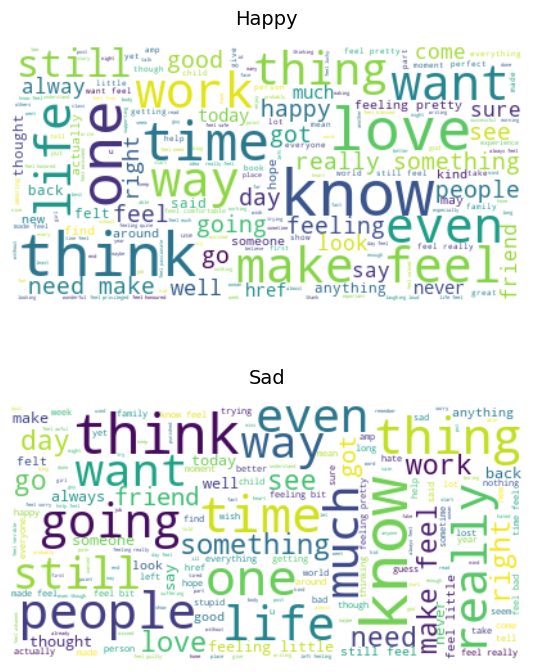

In [8]:
plt.figure(figsize=(15,8))

plt.subplot(2,1,1)
plt.imshow(happy_wordcloud, interpolation = "bilinear")
plt.title("Happy",y = 1.05,size = 14)
plt.axis("off")

plt.subplot(2,1,2)
plt.imshow(sad_wordcloud, interpolation = "bilinear")
plt.title("Sad",y = 1.05,size = 14)
plt.axis("off")

plt.subplots_adjust(hspace=0.4,wspace=0.4)
plt.show()

## Creating Train and Test Sets

In [9]:
x_train = train['cleaned_text'].values
x_test = test['cleaned_text'].values

y_train = train['emotion'].values
y_test = test['emotion'].values

## TF-IDF Vectorizer

In [10]:
tf_idf_word_vectorizer = TfidfVectorizer()

In [11]:
x_train_tf_idf_word = tf_idf_word_vectorizer.fit_transform(x_train)
x_test_tf_idf_word = tf_idf_word_vectorizer.transform(x_test)

## LightGBM Classifier

In [12]:
lgbm = LGBMClassifier()
lgbm_model = lgbm.fit(x_train_tf_idf_word,y_train)

accuracy = cross_val_score(lgbm_model, x_test_tf_idf_word, y_test, cv = 10).mean()

y_pred = lgbm_model.predict(x_test_tf_idf_word)

print(f"Accuracy\t:{round(accuracy,2)}")
print(f"Precision\t:{round(precision_score(y_test,y_pred),2)}")
print(f"Recall   \t:{round(recall_score(y_test,y_pred),2)}")

Accuracy	:0.94
Precision	:0.96
Recall   	:0.93


## Predict a Single Value

In [17]:
while(True):
    text = input("\nEnter the text (-1 to exit):\n-> ")
    if text == "-1":
        break
        
    text = text_preprocessing(text)
    text = tf_idf_word_vectorizer.transform([text])

    prediction = lgbm_model.predict(text)[0]

    if prediction == 1:
        result = "Happy"
    elif prediction == 0:
        result = "Sad"
    else:
        result = "Unknown"

    print(f"\nPredicted emotion is: {result}")
    print(''.center(50,'_'))


Enter the text (-1 to exit):
-> It seemed like I was qualified and about to get a promotion, but today my boss hired someone else for the position.

Predicted emotion is: Sad
__________________________________________________

Enter the text (-1 to exit):
-> Yesterday was my birthday and I had a wonderful day.

Predicted emotion is: Happy
__________________________________________________

Enter the text (-1 to exit):
-> -1
